# 0. Environment

## 0-1. check and install

In [1]:
!python --version

Python 3.6.9


In [2]:
import tensorflow as tf
print('tensorflow version:', tf.__version__)

tensorflow version: 2.4.3


In [3]:
import random

In [4]:

'''!apt update
!apt install wget
!apt install libsndfile1-dev -y'''

'!apt update\n!apt install wget\n!apt install libsndfile1-dev -y'

In [5]:
'''!python -m pip install --upgrade pip 
!python -m pip install librosa
!python -m pip install python_speech_features'''

'!python -m pip install --upgrade pip \n!python -m pip install install librosa\n!python -m pip install python_speech_features'

## 0-2. set parameter

In [6]:
dataset_path = './data_speech_commands_v002'

In [7]:
import numpy as np
commands = np.array(['yes','no','on','off'])

# 1. Prepare dataset

## 1-1. get dataset

In [8]:
import os
if not os.path.exists(dataset_path):
    if not os.path.isfile('speech_commands_v0.02.tar.gz') :
        !wget https://storage.googleapis.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz
    !mkdir data_speech_commands_v002
    !tar zxvf "./speech_commands_v0.02.tar.gz" --directory data_speech_commands_v002

## 2-2. dataset details

In [9]:
dataset_dirslist = np.array(tf.io.gfile.listdir(str(dataset_path)))
print ('dataset_dirslist:', dataset_dirslist,', num: ' , len(dataset_dirslist))
print('-')

dataset_commands_dirslist = dataset_dirslist
dataset_commands_dirslist = dataset_commands_dirslist[dataset_commands_dirslist != 'README.md']
dataset_commands_dirslist = dataset_commands_dirslist[dataset_commands_dirslist != '.DS_Store']
dataset_commands_dirslist = dataset_commands_dirslist[dataset_commands_dirslist != 'validation_list.txt']
dataset_commands_dirslist = dataset_commands_dirslist[dataset_commands_dirslist != 'testing_list.txt']
dataset_commands_dirslist = dataset_commands_dirslist[dataset_commands_dirslist != 'LICENSE']
dataset_commands_dirslist = dataset_commands_dirslist[dataset_commands_dirslist != '_background_noise_']
print ('dataset_commands_dirslist:', dataset_commands_dirslist,', num: ' , len(dataset_commands_dirslist))

dataset_dirslist: ['bird' 'wow' 'tree' 'on' 'nine' 'five' 'sheila' 'three' 'eight' 'four'
 'two' 'off' 'happy' 'forward' 'backward' 'stop' 'README.md' 'dog' 'cat'
 'left' 'validation_list.txt' 'go' 'house' 'learn' 'right' 'no' 'marvin'
 'zero' 'visual' 'follow' '_background_noise_' 'LICENSE' 'bed' 'seven'
 '.DS_Store' 'yes' 'testing_list.txt' 'down' 'one' 'up' 'six'] , num:  41
-
dataset_commands_dirslist: ['bird' 'wow' 'tree' 'on' 'nine' 'five' 'sheila' 'three' 'eight' 'four'
 'two' 'off' 'happy' 'forward' 'backward' 'stop' 'dog' 'cat' 'left' 'go'
 'house' 'learn' 'right' 'no' 'marvin' 'zero' 'visual' 'follow' 'bed'
 'seven' 'yes' 'down' 'one' 'up' 'six'] , num:  35


## 2-3. dataset commands filepaths

In [10]:
dataset_commands_filepaths = []
for item in dataset_commands_dirslist:
    dataset_commands_dir = os.path.join(dataset_path, item,'*')
    print('dataset_commands_dir:', dataset_commands_dir)
    fileslist = tf.io.gfile.glob(dataset_commands_dir)
    print('file num of',item,':', len(fileslist))
    dataset_commands_filepaths.extend(fileslist)
    print('-')
print('num of dataset_commands_filepaths:', len(dataset_commands_dirslist))
print('num of dataset_commands_filepaths:', len(dataset_commands_filepaths))
print('sample of dataset_commands_filepaths:', dataset_commands_filepaths[0])

dataset_commands_dir: ./data_speech_commands_v002/bird/*
file num of bird : 2064
-
dataset_commands_dir: ./data_speech_commands_v002/wow/*
file num of wow : 2123
-
dataset_commands_dir: ./data_speech_commands_v002/tree/*
file num of tree : 1759
-
dataset_commands_dir: ./data_speech_commands_v002/on/*
file num of on : 3845
-
dataset_commands_dir: ./data_speech_commands_v002/nine/*
file num of nine : 3934
-
dataset_commands_dir: ./data_speech_commands_v002/five/*
file num of five : 4052
-
dataset_commands_dir: ./data_speech_commands_v002/sheila/*
file num of sheila : 2022
-
dataset_commands_dir: ./data_speech_commands_v002/three/*
file num of three : 3727
-
dataset_commands_dir: ./data_speech_commands_v002/eight/*
file num of eight : 3787
-
dataset_commands_dir: ./data_speech_commands_v002/four/*
file num of four : 3728
-
dataset_commands_dir: ./data_speech_commands_v002/two/*
file num of two : 3880
-
dataset_commands_dir: ./data_speech_commands_v002/off/*
file num of off : 3745
-
datase

# 2. Audio Preporcess

## 2-1. function

### 2-1-1. split num

In [11]:
def get_split_num(train_ratio = 0.8, val_ratio = 0.1, test_ratio = 0.1, file_num = 0):
    #get train , val, test num
    train_num = int( file_num * train_ratio )
    val_num = int( file_num * val_ratio )
    test_num = file_num - train_num - val_num 

    #get train , val, test first_num
    train_first_num = 0
    val_first_num = train_num
    test_first_num = train_num + val_num
    
    return train_first_num, val_first_num, test_first_num

### 2-1-2. label

In [12]:
def get_label(filepath):
    split_1=os.path.split(filepath)
    split_2=os.path.split(split_1[0])
    return split_2[1]
tmp = get_label(dataset_commands_filepaths[0])
print ('get_label(dataset_commands_filepaths[0]):')
print (type(tmp))
print (tmp)

get_label(dataset_commands_filepaths[0]):
<class 'str'>
bird


### 2-1-3. waveform

In [13]:
import librosa
def get_waveform(filepath):
    sample_rate = 16000
    waveform, fs = librosa.load(filepath, sr=sample_rate)
    return waveform
tmp = get_waveform(dataset_commands_filepaths[0])
print ('get_waveform(dataset_commands_filepaths[0]):')
print (type(tmp))
print (tmp.shape)
print (tmp)

get_waveform(dataset_commands_filepaths[0]):
<class 'numpy.ndarray'>
(16000,)
[ 0.00015259  0.00088501 -0.00030518 ...  0.00097656  0.00079346
  0.00067139]


### 2-1-4. label id

In [14]:
def get_label_id(label,command_list):
    label_id = np.argmax(label==command_list)
    return label_id
tmp = get_label_id(get_label(dataset_commands_filepaths[0]),dataset_commands_dirslist)
print ('get_label_id(get_label(dataset_commands_filepaths[0]):')
print (type(tmp))
print (tmp)

get_label_id(get_label(dataset_commands_filepaths[0]):
<class 'numpy.int64'>
0


### 2-1-5. MFCC

get_features_m(get_waveform(dataset_commands_files[0])):
<class 'numpy.ndarray'>
(16, 16)


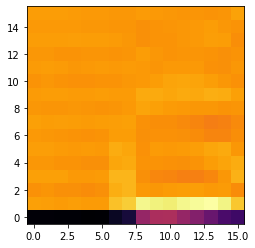

In [15]:
import python_speech_features
import matplotlib.pyplot as plt
def get_features_m(waveform):
    # Zero-padding for an audio waveform with less than 16,000 samples.
    #input_len = 16000
    #waveform = waveform[:input_len]
    # np.shape(waveform) =  (16000,)
    zero_padding = np.zeros( (16000-np.shape(waveform)[0],), dtype=np.float32)
    # Cast the waveform tensors with np.float32
    waveform = np.cast['float32'](waveform)
    # Concatenate the waveform with `zero_padding`, which ensures all audio clips are of the same length.
    equal_length = np.concatenate([waveform, zero_padding], 0)
    
    sample_rate = 16000
    num_mfcc = 16
    len_mfcc = 40
    mfccs = python_speech_features.base.mfcc(equal_length, 
                                            samplerate=sample_rate,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()
tmp = get_features_m(get_waveform(dataset_commands_filepaths[0]))
print ('get_features_m(get_waveform(dataset_commands_files[0])):')
print (type(tmp))
print (tmp.shape)
#print (tmp)
fig = plt.figure()
plt.imshow(tmp, cmap='inferno', origin='lower')

### 2-1-6. Spectrum(optional)

get_features(get_waveform(dataset_commands_files[0])):
<class 'numpy.ndarray'>
126
(126, 257)
[[7.8792565e-02 1.9343071e-01 2.3035459e-01 ... 2.1647247e-05
  7.0432015e-04 7.6670665e-04]
 [2.7902070e-02 1.7402110e-01 2.3155710e-01 ... 1.0528803e-03
  9.7098021e-04 1.4394734e-04]
 [4.1548494e-01 6.5685660e-01 9.8971790e-01 ... 3.4597244e-03
  2.4347047e-03 1.3547541e-03]
 ...
 [3.9385643e-02 2.3239355e-01 2.7876863e-01 ... 8.9146249e-04
  5.8035715e-04 1.4487674e-04]
 [5.6532890e-02 2.0199598e-01 2.1348533e-01 ... 1.9922811e-03
  2.4451835e-03 2.7364760e-03]
 [3.7457574e-02 1.7731035e-01 2.3021065e-01 ... 4.6135816e-03
  4.6519507e-03 5.0910772e-03]]


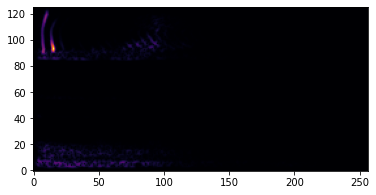

In [16]:
import python_speech_features
import matplotlib.pyplot as plt
def get_features(waveform):
    # Zero-padding for an audio waveform with less than 16,000 samples.
    #input_len = 16000
    #waveform = waveform[:input_len]
    # np.shape(waveform) =  (16000,)
    zero_padding = np.zeros( (16000-np.shape(waveform)[0],), dtype=np.float32)
    # Cast the waveform tensors with np.float32
    waveform = np.cast['float32'](waveform)
    # Concatenate the waveform with `zero_padding`, which ensures all audio clips are of the same length.
    equal_length = np.concatenate([waveform, zero_padding], 0)
    
    sample_rate = 16000
    num_mfcc = 16
    len_mfcc = 40
    spectrum = np.abs(librosa.stft(equal_length,512))
    return spectrum.transpose()
tmp = get_features(get_waveform(dataset_commands_filepaths[5000]))
print ('get_features(get_waveform(dataset_commands_files[0])):')
print (type(tmp))
print (len(tmp))
print (tmp.shape)
print (tmp)
fig = plt.figure()
plt.imshow(tmp, cmap='inferno', origin='lower')

## 2-2. Preporcess set commands

In [17]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

### 2-2-1. get set command filepaths

In [18]:

train_set_commands_filepaths = []
val_set_commands_filepaths = []
test_set_commands_filepaths = []
set_commands_dirslist = commands
for item in set_commands_dirslist:
    set_commands_dir = os.path.join(dataset_path, item,'*')
    print('set_commands_dir:', set_commands_dir)
    
    fileslist = tf.io.gfile.glob(set_commands_dir)
    random.shuffle(fileslist)
    print('file num :', len(fileslist))
    
    train, val, test = get_split_num(0.8, 0.1, 0.1, len(fileslist))
    train_set_commands_filepaths.extend(fileslist[:val])
    val_set_commands_filepaths.extend(fileslist[val:test])
    test_set_commands_filepaths.extend(fileslist[test:])
    
    print('-')
print('num of train_set_commands_filepaths:', len(train_set_commands_filepaths))
print('num of val_set_commands_filepaths:', len(val_set_commands_filepaths))
print('num of test_set_commands_filepaths:', len(test_set_commands_filepaths))
total_set_commands_num = len(train_set_commands_filepaths)+len(val_set_commands_filepaths)+len(test_set_commands_filepaths)
print('total of set_commands_filepaths:',total_set_commands_num)
print('sample of train_set_commands_filepaths:', train_set_commands_filepaths[0])


set_commands_dir: ./data_speech_commands_v002/yes/*
file num : 4044
-
set_commands_dir: ./data_speech_commands_v002/no/*
file num : 3941
-
set_commands_dir: ./data_speech_commands_v002/on/*
file num : 3845
-
set_commands_dir: ./data_speech_commands_v002/off/*
file num : 3745
-
num of train_set_commands_filepaths: 12459
num of val_set_commands_filepaths: 1556
num of test_set_commands_filepaths: 1560
total of set_commands_filepaths: 15575
sample of train_set_commands_filepaths: ./data_speech_commands_v002/yes/e9abfe31_nohash_3.wav


### 2-2-2. get MFCCs and label id

In [19]:
train_set_commands_features = []
val_set_commands_features = []
test_set_commands_features = []

train_set_commands_label_id = []
val_set_commands_label_id = []
test_set_commands_label_id = []

convert_num = 1000000

for i, item in enumerate(train_set_commands_filepaths):
    if i<convert_num:
        waveform = get_waveform(item)
        features = get_features(waveform)
        train_set_commands_features.append(features)
        
        label = get_label(item)
        label_id = get_label_id(label,commands)
        train_set_commands_label_id.append(label_id)

for i, item in enumerate(val_set_commands_filepaths):
    if i<convert_num:
        waveform = get_waveform(item)
        features = get_features(waveform)
        val_set_commands_features.append(features)
        
        label = get_label(item)
        label_id = get_label_id(label,commands)
        val_set_commands_label_id.append(label_id)
        
for i, item in enumerate(test_set_commands_filepaths):
    if i<convert_num:
        waveform = get_waveform(item)
        features = get_features(waveform)
        test_set_commands_features.append(features)
        
        label = get_label(item)
        label_id = get_label_id(label,commands)
        test_set_commands_label_id.append(label_id)        
        

print ('num of train_set_commands_features:', len(train_set_commands_features))
print ('num of train_set_commands_label_id:', len(train_set_commands_label_id))
print('-')
print ('num of val_set_commands_features:', len(val_set_commands_features))
print ('num of val_set_commands_label_id:', len(val_set_commands_label_id))
print('-')
print ('num of test_set_commands_features:', len(test_set_commands_features))
print ('num of test_set_commands_label_id:', len(test_set_commands_label_id)) 

num of train_set_commands_features: 12459
num of train_set_commands_label_id: 12459
-
num of val_set_commands_features: 1556
num of val_set_commands_label_id: 1556
-
num of test_set_commands_features: 1560
num of test_set_commands_label_id: 1560


### 2-2-3. add features and label id to dataset

In [20]:
x_train.extend(train_set_commands_features)
y_train.extend(train_set_commands_label_id)
x_val.extend(val_set_commands_features)
y_val.extend(val_set_commands_label_id)
x_test.extend(test_set_commands_features)
y_test.extend(test_set_commands_label_id)

print('num of x_train:',len(y_train))
print('num of y_train:',len(y_train))
print('-')
print('num of x_val:',len(x_val))
print('num of y_val:',len(y_val))
print('-')
print('num of x_test:',len(x_test))
print('num of y_test:',len(y_test))

num of x_train: 12459
num of y_train: 12459
-
num of x_val: 1556
num of y_val: 1556
-
num of x_test: 1560
num of y_test: 1560


## 2-3. Preporcess unknown commands

### 2-3-1. get unknown command filepaths

In [21]:
train_unknown_commands_filepaths = []
val_unknown_commands_filepaths = []
test_unknown_commands_filepaths = []

if not np.any(commands=='unknown'):
    commands = np.append(commands,'unknown')
print ('commands:',commands)
print('-')

unknown_commands_dirslist = np.setdiff1d( dataset_commands_dirslist , commands)
print ('unknown_commands_dirslist:',unknown_commands_dirslist)
print('-')

each_command = total_set_commands_num//len(set_commands_dirslist)
print ('each_command:', each_command)
each_unknown_command = each_command//len(unknown_commands_dirslist)
each_unknown_command = 700
print ('each_unknown_command:', each_unknown_command)
print('-')

for item in unknown_commands_dirslist:
    unknown_commands_dir = os.path.join(dataset_path, item,'*')
    print('unknown_commands_dir:', unknown_commands_dir)
    
    fileslist = tf.io.gfile.glob(unknown_commands_dir)
    random.shuffle(fileslist)
    print('file num :', len(fileslist))
    
    train, val, test = get_split_num(0.8, 0.1, 0.1, each_unknown_command)
    train_unknown_commands_filepaths.extend(fileslist[:val])
    val_unknown_commands_filepaths.extend(fileslist[val:test])
    test_unknown_commands_filepaths.extend(fileslist[test:each_unknown_command])
    print('-')
    
print('num of train_unknown_commands_filepaths:', len(train_unknown_commands_filepaths))
print('num of val_unknown_commands_filepaths:', len(val_unknown_commands_filepaths))
print('num of test_unknown_commands_filepaths:', len(test_unknown_commands_filepaths))
print('sample of train_unknown_commands_filepaths:', train_unknown_commands_filepaths[0])

commands: ['yes' 'no' 'on' 'off' 'unknown']
-
unknown_commands_dirslist: ['backward' 'bed' 'bird' 'cat' 'dog' 'down' 'eight' 'five' 'follow'
 'forward' 'four' 'go' 'happy' 'house' 'learn' 'left' 'marvin' 'nine'
 'one' 'right' 'seven' 'sheila' 'six' 'stop' 'three' 'tree' 'two' 'up'
 'visual' 'wow' 'zero']
-
each_command: 3893
each_unknown_command: 700
-
unknown_commands_dir: ./data_speech_commands_v002/backward/*
file num : 1664
-
unknown_commands_dir: ./data_speech_commands_v002/bed/*
file num : 2014
-
unknown_commands_dir: ./data_speech_commands_v002/bird/*
file num : 2064
-
unknown_commands_dir: ./data_speech_commands_v002/cat/*
file num : 2031
-
unknown_commands_dir: ./data_speech_commands_v002/dog/*
file num : 2128
-
unknown_commands_dir: ./data_speech_commands_v002/down/*
file num : 3917
-
unknown_commands_dir: ./data_speech_commands_v002/eight/*
file num : 3787
-
unknown_commands_dir: ./data_speech_commands_v002/five/*
file num : 4052
-
unknown_commands_dir: ./data_speech_command

### 2-3-2. get MFCC and label id

In [22]:
train_unknown_commands_features = []
val_unknown_commands_features = []
test_unknown_commands_features = []

train_unknown_commands_label_id = []
val_unknown_commands_label_id = []
test_unknown_commands_label_id = []

convert_num = 100000

label = 'unknown'

for i, item in enumerate(train_unknown_commands_filepaths):
    if i<convert_num:
        waveform = get_waveform(item)
        features = get_features(waveform)
        train_unknown_commands_features.append(features)
       
        label_id = get_label_id(label,commands)
        train_unknown_commands_label_id.append(label_id)

for i, item in enumerate(val_unknown_commands_filepaths):
    if i<convert_num:
        waveform = get_waveform(item)
        features = get_features(waveform)
        val_unknown_commands_features.append(features)

        label_id = get_label_id(label,commands)
        val_unknown_commands_label_id.append(label_id)
        
for i, item in enumerate(test_unknown_commands_filepaths):
    if i<convert_num:
        waveform = get_waveform(item)
        features = get_features(waveform)
        test_unknown_commands_features.append(features)

        label_id = get_label_id(label,commands)
        test_unknown_commands_label_id.append(label_id)        
        

print ('num of train_unknown_commands_features:', len(train_unknown_commands_features))
print ('num of train_unknown_commands_label_id:', len(train_unknown_commands_label_id))
print('-')
print ('num of val_unknown_commands_features:', len(val_unknown_commands_features))
print ('num of val_unknown_commands_label_id:', len(val_unknown_commands_label_id))
print('-')
print ('num of test_unknown_commands_features:', len(test_unknown_commands_features))
print ('num of test_unknown_commands_label_id:', len(test_unknown_commands_label_id)) 

num of train_unknown_commands_features: 17360
num of train_unknown_commands_label_id: 17360
-
num of val_unknown_commands_features: 2170
num of val_unknown_commands_label_id: 2170
-
num of test_unknown_commands_features: 2170
num of test_unknown_commands_label_id: 2170


### 2-3-3. add features and label id to dataset

In [23]:
x_train.extend(train_unknown_commands_features)
y_train.extend(train_unknown_commands_label_id)
x_val.extend(val_unknown_commands_features)
y_val.extend(val_unknown_commands_label_id)
x_test.extend(test_unknown_commands_features)
y_test.extend(test_unknown_commands_label_id)

print('num of x_train:',len(x_train))
print('num of y_train:',len(y_train))
print('-')
print('num of x_val:',len(x_val))
print('num of y_val:',len(y_val))
print('-')
print('num of x_test:',len(x_test))
print('num of y_test:',len(y_test))

num of x_train: 29819
num of y_train: 29819
-
num of x_val: 3726
num of y_val: 3726
-
num of x_test: 3730
num of y_test: 3730


## 2-4. Preporcess slience command

### 2-4-1. get background command filepaths

In [24]:
train_slience_commands_filepaths = []
val_slience_commands_filepaths = []
test_slience_commands_filepaths = []

if not np.any(commands=='slience'):
    commands = np.append(commands,'slience')
print ('commands:',commands)
print('-')

slience_commands_dirslist = ['_background_noise_']
print ('slience_commands_dirslist:',slience_commands_dirslist)
print('-')

print ('total_set_commands_num:', total_set_commands_num)
slience_ratio = 1
slience_command_num = int(total_set_commands_num * slience_ratio)
print ('slience_command_num:', slience_command_num)
print('-')

for item in slience_commands_dirslist:
    slience_commands_dir = os.path.join(dataset_path, item,'*.wav')
    print('slience_commands_dir:', slience_commands_dir)
    
    fileslist = tf.io.gfile.glob(slience_commands_dir)
    print('file num :', len(fileslist))
    
    each_slience_files = slience_command_num//len(fileslist)
    print ('each_slience_files:', each_slience_files)
  
    train_num = int(each_slience_files*0.8)
    val_num = int(each_slience_files*0.1)
    test_num = int(each_slience_files*0.1)
    print('-')
    
    for itme in fileslist:
        for i in range(train_num):
            train_slience_commands_filepaths.append(itme)
        for i in range(val_num):
            val_slience_commands_filepaths.append(itme)
        for i in range(test_num):
            test_slience_commands_filepaths.append(itme)

print('num of train_slience_commands_filepaths:', len(train_slience_commands_filepaths))
print('num of val_slience_commands_filepaths:', len(val_slience_commands_filepaths))
print('num of test_slience_commands_filepaths:', len(test_slience_commands_filepaths))
print('sample of train_slience_commands_filepaths:', train_slience_commands_filepaths[0])





commands: ['yes' 'no' 'on' 'off' 'unknown' 'slience']
-
slience_commands_dirslist: ['_background_noise_']
-
total_set_commands_num: 15575
slience_command_num: 15575
-
slience_commands_dir: ./data_speech_commands_v002/_background_noise_/*.wav
file num : 6
each_slience_files: 2595
-
num of train_slience_commands_filepaths: 12456
num of val_slience_commands_filepaths: 1554
num of test_slience_commands_filepaths: 1554
sample of train_slience_commands_filepaths: ./data_speech_commands_v002/_background_noise_/white_noise.wav


### 2-4-2. contruct slience features and label id

In [25]:
import random
random.seed(66)

train_slience_commands_features = []
val_slience_commands_features = []
test_slience_commands_features = []

train_slience_commands_label_id = []
val_slience_commands_label_id = []
test_slience_commands_label_id = []

label = 'slience'

for i, item in enumerate(train_slience_commands_filepaths):
    #print('slience_commands_filepath:',item)
    waveform = get_waveform(item)
    waveform_len = waveform.shape[0]
    waveform_s = waveform_len/16000

    split_start_time = random.randrange(0, waveform_len)
    waveform_split = waveform[split_start_time:split_start_time+16000]
    waveform_split_len = waveform_split.shape[0]
    waveform_split_s = waveform_split_len/16000
  
    features = get_features(waveform_split)
    train_slience_commands_features.append(features)

    label_id = get_label_id(label,commands)
    train_slience_commands_label_id.append(label_id)

for i, item in enumerate(val_slience_commands_filepaths):

    waveform = get_waveform(item)
    waveform_len = waveform.shape[0]
    waveform_s = waveform_len/16000

    split_start_time = random.randrange(0, waveform_len)
    waveform_split = waveform[split_start_time:split_start_time+16000]
    waveform_split_len = waveform_split.shape[0]
    waveform_split_s = waveform_split_len/16000
  
    features = get_features(waveform_split)
    val_slience_commands_features.append(features)

    label_id = get_label_id(label,commands)
    val_slience_commands_label_id.append(label_id)    

for i, item in enumerate(test_slience_commands_filepaths):

    waveform = get_waveform(item)
    waveform_len = waveform.shape[0]
    waveform_s = waveform_len/16000

    split_start_time = random.randrange(0, waveform_len)
    waveform_split = waveform[split_start_time:split_start_time+16000]
    waveform_split_len = waveform_split.shape[0]
    waveform_split_s = waveform_split_len/16000
  
    features = get_features(waveform_split)
    test_slience_commands_features.append(features)

    label_id = get_label_id(label,commands)
    test_slience_commands_label_id.append(label_id)    
    
print ('num of train_slience_commands_features:', len(train_slience_commands_features))
print ('num of train_slience_commands_label_id:', len(train_slience_commands_label_id))
print('-')
print ('num of val_slience_commands_features:', len(val_slience_commands_features))
print ('num of val_slience_commands_label_id:', len(val_slience_commands_label_id))
print('-')
print ('num of test_slience_commands_features:', len(test_slience_commands_features))
print ('num of test_slience_commands_label_id:', len(test_slience_commands_label_id)) 




num of train_slience_commands_features: 12456
num of train_slience_commands_label_id: 12456
-
num of val_slience_commands_features: 1554
num of val_slience_commands_label_id: 1554
-
num of test_slience_commands_features: 1554
num of test_slience_commands_label_id: 1554


### 2-4-3. add features and label id to dataset

In [26]:
x_train.extend(train_slience_commands_features)
y_train.extend(train_slience_commands_label_id)
x_val.extend(val_slience_commands_features)
y_val.extend(val_slience_commands_label_id)
x_test.extend(test_slience_commands_features)
y_test.extend(test_slience_commands_label_id)

print('num of x_train:',len(x_train))
print('num of y_train:',len(y_train))
print('-')
print('num of x_val:',len(x_val))
print('num of y_val:',len(y_val))
print('-')
print('num of x_test:',len(x_test))
print('num of y_test:',len(y_test))

num of x_train: 42275
num of y_train: 42275
-
num of x_val: 5280
num of y_val: 5280
-
num of x_test: 5284
num of y_test: 5284


# 3. Train

In [27]:
''''''
feature_sets_file = 'all_targets_mfcc_sets.npz'
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)
''''''

''

In [28]:
'''
feature_sets_path = './'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
# Load feature sets
feature_sets = np.load(os.path.join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
'''

"\nfeature_sets_path = './'\nfeature_sets_filename = 'all_targets_mfcc_sets.npz'\n# Load feature sets\nfeature_sets = np.load(os.path.join(feature_sets_path, feature_sets_filename))\nprint(feature_sets.files)\n# Assign feature sets\nx_train = feature_sets['x_train']\ny_train = feature_sets['y_train']\nx_val = feature_sets['x_val']\ny_val = feature_sets['y_val']\nx_test = feature_sets['x_test']\ny_test = feature_sets['y_test']\n"

## 1. set parameter

In [29]:
train_list = list(zip(x_train, y_train))
random.shuffle(train_list)
x_train, y_train = zip(*train_list)

val_list = list(zip(x_val, y_val))
random.shuffle(val_list)
x_val, y_val = zip(*val_list)

test_list = list(zip(x_test, y_test))
random.shuffle(test_list)
x_test, y_test = zip(*test_list)

x_tn = np.array(x_train)
y_tn = np.array(y_train)
x_v = np.array(x_val)
y_v = np.array(y_val)
x_ts = np.array(x_test)
y_ts = np.array(y_test)

x_tn = np.expand_dims(x_tn, axis=-1)
x_v = np.expand_dims(x_v, axis=-1)
x_ts = np.expand_dims(x_ts, axis=-1)

print (x_tn.shape)
print (y_tn.shape)
print (x_v.shape)
print (y_v.shape)
print (x_ts.shape)
print (y_ts.shape)



(42275, 126, 257, 1)
(42275,)
(5280, 126, 257, 1)
(5280,)
(5284, 126, 257, 1)
(5284,)


## 2. build model

In [30]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import models

tmp = get_features(get_waveform(dataset_commands_filepaths[0]))
tmp = np.expand_dims(tmp, axis=-1)
input_shape = tmp.shape
print('Input shape:', input_shape)
num_labels = len(commands)

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (126, 257, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 255, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 253, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 251, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 125, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 125, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 480000)            0         
_________________________________________________________________
dense (Dense)                

In [31]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

## 3. train

In [32]:
EPOCHS = 500
history = model.fit(
    x_tn,y_tn,
    validation_data=(x_v,y_v),
    epochs=EPOCHS,
    batch_size=5,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/500
8455/8455 [==============================] - 3356s 397ms/step - loss: 0.6875 - accuracy: 0.7704 - val_loss: 0.3646 - val_accuracy: 0.8795
Epoch 2/500
8455/8455 [==============================] - 3333s 394ms/step - loss: 0.2670 - accuracy: 0.9028 - val_loss: 0.3191 - val_accuracy: 0.9011
Epoch 3/500
8455/8455 [==============================] - 3326s 393ms/step - loss: 0.1715 - accuracy: 0.9410 - val_loss: 0.2972 - val_accuracy: 0.9108
Epoch 4/500
8455/8455 [==============================] - 3322s 393ms/step - loss: 0.1187 - accuracy: 0.9618 - val_loss: 0.3394 - val_accuracy: 0.9148
Epoch 5/500
8455/8455 [==============================] - 3332s 394ms/step - loss: 0.0717 - accuracy: 0.9767 - val_loss: 0.5512 - val_accuracy: 0.9015
Epoch 6/500
8455/8455 [==============================] - 3341s 395ms/step - loss: 0.0557 - accuracy: 0.9838 - val_loss: 0.4772 - val_accuracy: 0.9097
Epoch 00006: early stopping


## 4. result

## 5. save

In [33]:
model_filename = 'SpeechCommandRecognition_model.h5'
# Save the model as a file
models.save_model(model, model_filename)

## 6. inference on test set

In [34]:
from tensorflow import lite
from tensorflow.keras import models
# Parameters
keras_model_filename = 'SpeechCommandRecognition_model.h5'
tflite_filename = 'SpeechCommandRecognition_model.tflite'

In [35]:
# Convert model to TF Lite model
model = models.load_model(keras_model_filename)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(tflite_filename, 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpr4y0jb6b/assets


INFO:tensorflow:Assets written to: /tmp/tmpr4y0jb6b/assets


245879060

# dev

In [36]:
print ('num of train_unknown_commands_features:', len(train_unknown_commands_features))
print ('num of train_unknown_commands_label_id:', len(train_unknown_commands_label_id))
print('-')
print ('num of val_unknown_commands_features:', len(val_unknown_commands_features))
print ('num of val_unknown_commands_label_id:', len(val_unknown_commands_label_id))
print('-')
print ('num of test_unknown_commands_features:', len(test_unknown_commands_features))
print ('num of test_unknown_commands_label_id:', len(test_unknown_commands_label_id)) 
i=random.randrange(0, len(train_unknown_commands_features))
print (i)
print (train_unknown_commands_label_id[i])

num of train_unknown_commands_features: 17360
num of train_unknown_commands_label_id: 17360
-
num of val_unknown_commands_features: 2170
num of val_unknown_commands_label_id: 2170
-
num of test_unknown_commands_features: 2170
num of test_unknown_commands_label_id: 2170
4995
4


In [37]:
print ('num of train_slience_commands_features:', len(train_slience_commands_features))
print ('num of train_slience_commands_label_id:', len(train_slience_commands_label_id))
print('-')
print ('num of val_slience_commands_features:', len(val_slience_commands_features))
print ('num of val_slience_commands_label_id:', len(val_slience_commands_label_id))
print('-')
print ('num of test_slience_commands_features:', len(test_slience_commands_features))
print ('num of test_slience_commands_label_id:', len(test_slience_commands_label_id)) 

i=random.randrange(0, len(train_slience_commands_features))
print (i)
print (train_slience_commands_label_id[i])

num of train_slience_commands_features: 12456
num of train_slience_commands_label_id: 12456
-
num of val_slience_commands_features: 1554
num of val_slience_commands_label_id: 1554
-
num of test_slience_commands_features: 1554
num of test_slience_commands_label_id: 1554
5246
5
